## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


# Maanik Gupta

# Maya Sandlin

# Robert Golden

In [6]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Read CSVs for later use
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

#print(movie_gross.info())
#Clean studio, domestic_gross, & foreign_gross
#movie_gross = movie_gross.dropna()
#movie_gross.info()

rt_movie_info = rt_movie_info.dropna()
#Clean synopsis, rating, genre, director, writer, theater_date, dvd_date, runtime 
ratings = []
for rating in rt_movie_info['rating'].dropna():
    ratings.append(rating)
#print(ratings)
print(len(ratings))

runtime_raw = []
runtime_clean = []
box_off_raw = []
box_off_clean = []
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters, movies under 100 min will have whitespace
    runtime_raw.append(val) 
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '') 
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)

rt_movie_info['runtime_clean'] = runtime_clean
rt_movie_info['box_office_clean'] = box_off_clean

df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
df2['box_office_clean'] = df2['box_office_clean'].astype(int)



#print(len(runtime))
#drop currency, box_office, studio

#rt_movie_info.dropna(subset=['currency'])
#rt_movie_info.info()

#print(rt_reviews.info())
#Clean review, rating, fresh, critic, top_critic, publisher, date


#print(tn_movie_budgets.info())
#Nothing to clean

#print(tmdb_movies.info())
#Nothing to clean

235


In [7]:
max1 = df2['runtime_clean'].max()
Q1_3 = df2['runtime_clean'].quantile(q=0.75)
mean1 = df2['runtime_clean'].mean()
med1 = df2['runtime_clean'].median()
std1 = df2['runtime_clean'].std()
Q1_1 = df2['runtime_clean'].quantile(q=0.25)
min1 = df2['runtime_clean'].min()

print('Mean runtime:', mean1)
print('')
print('Maximum runtime:', max1)
print('75th Percentile:', Q1_3)
print('Median runtime:', med1)
print('25th Percentile:', Q1_1)
print('Minimum runtime:', min1)
print('Interquartile Range:', Q1_3-Q1_1)
print('Std. Dev. of runtime:', std1)

print('99.7% of observations should lay between:', mean1-(std1*3), '-',mean1+(std1*3))

print('') #for readability

mean2 = df2['box_office_clean'].mean()
max2 = df2['box_office_clean'].max()
Q2_3 = df2['box_office_clean'].quantile(q=0.75)
med2 = df2['box_office_clean'].median()
Q2_1 = df2['box_office_clean'].quantile(q=0.25)
min2 = df2['box_office_clean'].min()
std2 = df2['box_office_clean'].std()

print('Mean box office sales:', mean2)
print('')
print('Maximum sales:', max2)
print('75th Percentile:', Q2_3)
print('Median sales:', med2)
print('25th Percentile:', Q2_1)
print('Minimum sales:', min2)
print('Std. Dev of Sales:', std2)
print('Interquartile Range:', Q2_3-Q2_1)
print('99.7% of observations should lay between:', mean2-(std2*3), '-', mean2+(std2*3))

print('') #for readability
      
print(df2.corr()) #calculate Pearson correlation coefficient for variables in df2

d1 = np.random.normal(mean1, std1, 235) #generate a normal distribution where mean1 is avg, sd1 is std dev, and n=235
d2 = np.random.normal(mean2, std2, 235) #generate a normal distribution where mean2 is avg, sd2 is std dev, and n=235



#df2['runtime_clean'].plot.box(grid='True')
#df2['box_office_clean'].plot.box(grid='True')

Mean runtime: 106.66382978723404

Maximum runtime: 188
75th Percentile: 117.0
Median runtime: 105.0
25th Percentile: 93.0
Minimum runtime: 67
Interquartile Range: 24.0
Std. Dev. of runtime: 18.147124581299227
99.7% of observations should lay between: 52.22245604333635 - 161.10520353113174

Mean box office sales: 41958400.02127659

Maximum sales: 368000000
75th Percentile: 52649522.5
Median sales: 15536310.0
25th Percentile: 2302444.5
Minimum sales: 363
Std. Dev of Sales: 62630155.51836797
Interquartile Range: 50347078.0
99.7% of observations should lay between: -145932066.5338273 - 229848866.5763805

                  runtime_clean  box_office_clean
runtime_clean          1.000000          0.312157
box_office_clean       0.312157          1.000000


In [34]:
n = 235
df = n - 1

t_crit = stats.t.ppf(0.05, 234)
print('T-critical value:', t_crit)

t = stats.t.ppf(q=1-(0.05/2), df=234)
print('Test statistic:', ttest_results)

p_value = stats.t.sf(t, df=234)
print(p_value)


x = np.linspace(-5, 5, 200)
y = stats.t.pdf(x, df, 0, 1)



#Set up figure and axes
#fig, ax = plt.subplots(figsize=(8,5))

# Plot the PDF as a line graph# (x and y were created in previous plotting code)
#ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our critical t-value
#ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')

# Fill area under line graph where x value is creater than critical t
#ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

# Plot a vertical line for our measured difference in sales t-statistic
#ax.axvline(t, color='red', linestyle='--', lw=5,label='observed t-statistic')

#ax.legend();

T-critical value: -1.6513914747179255
Test statistic: 1.6513914747179248
0.025000000000060495


C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

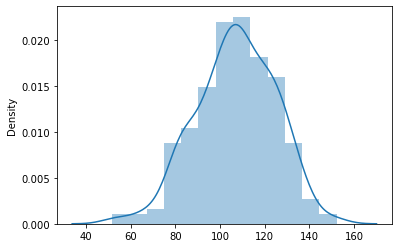

In [350]:
sns.distplot(d1)


C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

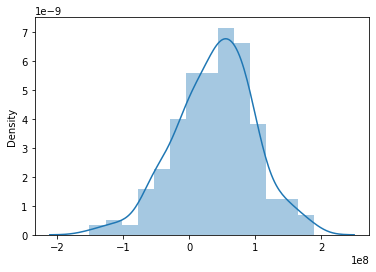

In [352]:
sns.distplot(d2)

<AxesSubplot:ylabel='Density'>

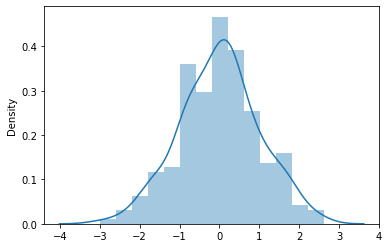

In [357]:
sns.distplot([(x - d1.mean())/d1.std() for x in d1])


C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


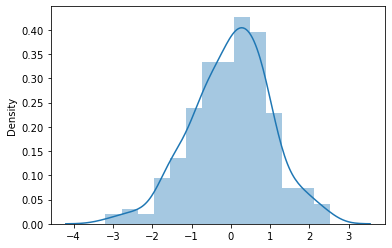

In [358]:
sns.distplot([(x - d2.mean())/d2.std() for x in d2])

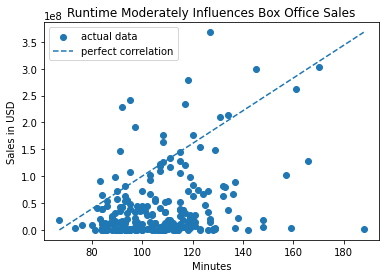

In [371]:
fig, ax = plt.subplots()

ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="actual data")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")



ax.set_title("Runtime Moderately Influences Box Office Sales")
ax.set_xlabel("Minutes")
ax.set_ylabel("Sales in USD")



ax.legend();

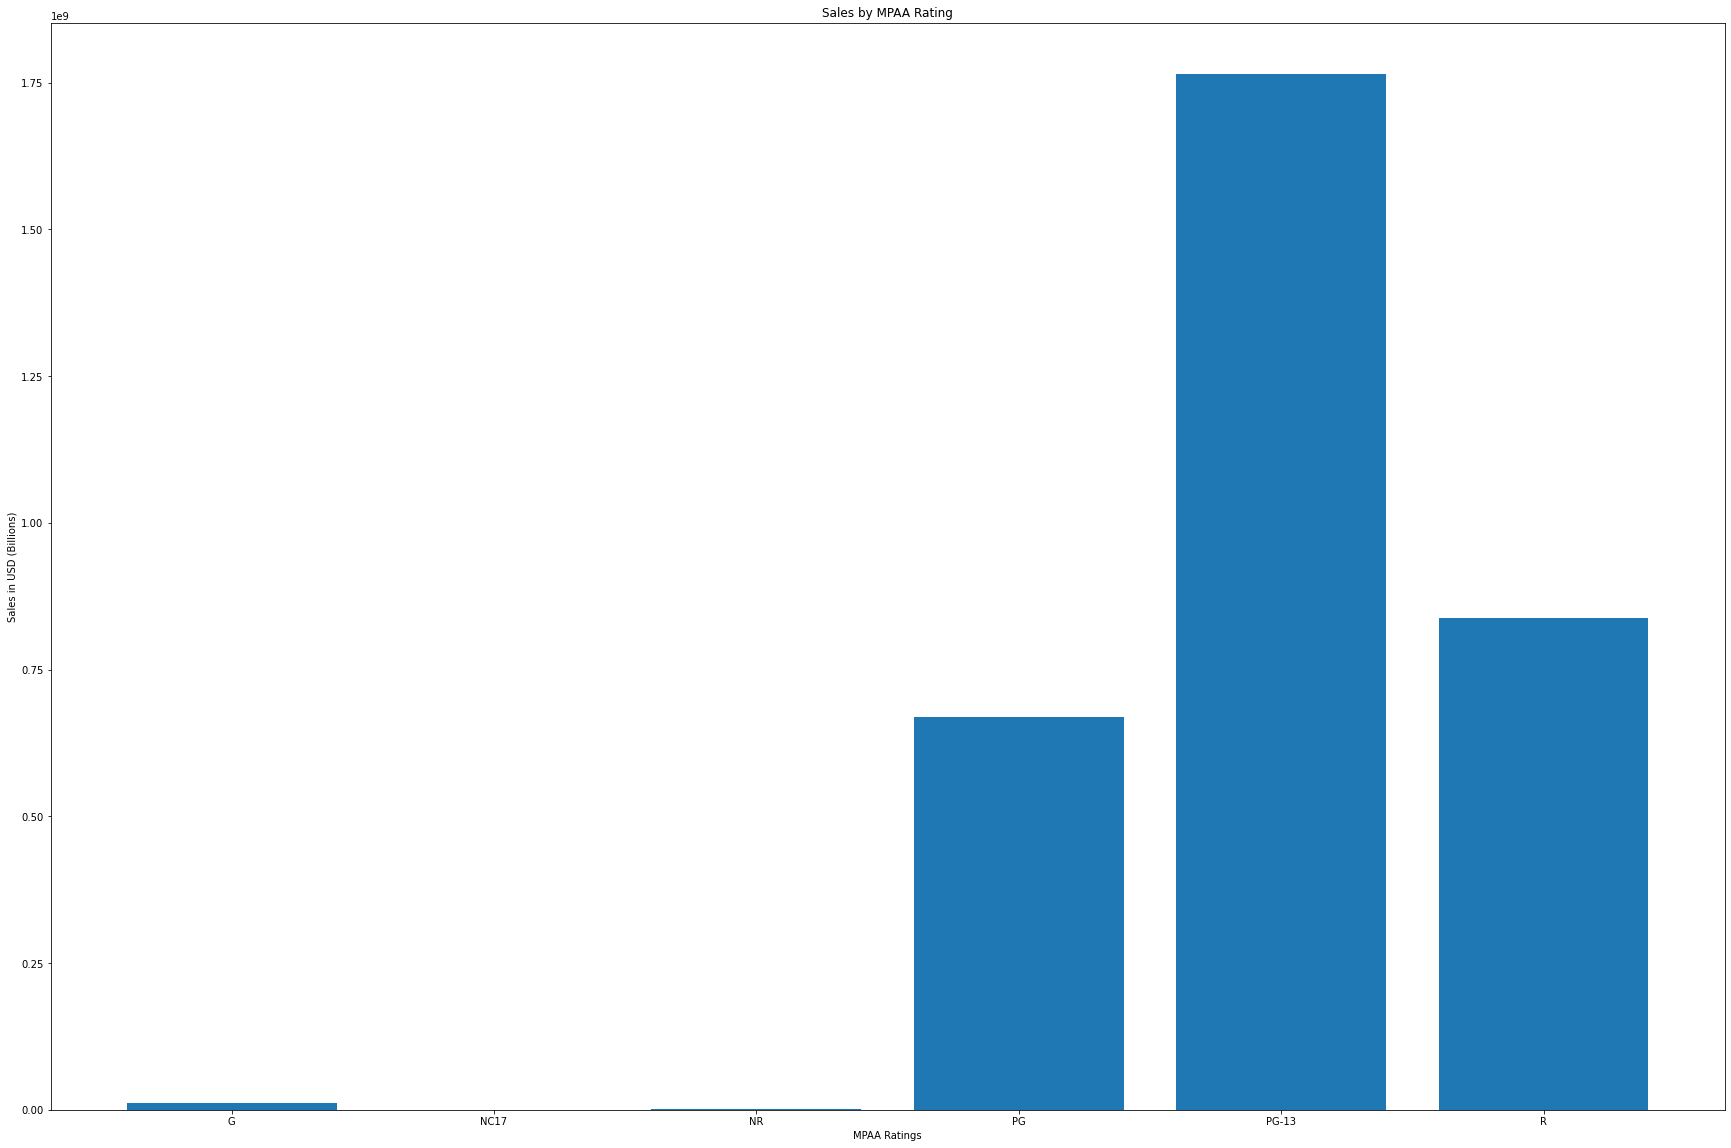

In [168]:
df3 = rt_movie_info[['rating', 'box_office_clean']].copy() #copies rt_movie_info into new dataframe
df3 = df3.dropna() #drops null values

df3['box_office_clean'] = df3['box_office_clean'].astype(int) #ensures box office sales are integers

sales_groupby_rating = df3.groupby('rating')[['box_office_clean']].sum()
sales_groupby_rating = sales_groupby_rating / (10^9)

fig, ax = plt.subplots(figsize=(30,20))
ax.bar(x=sales_groupby_rating.index, height=sales_groupby_rating['box_office_clean'])
plt.title('Sales by MPAA Rating')
plt.xlabel('MPAA Ratings')
plt.ylabel('Sales in USD (Billions)')
plt.show()

In [207]:
import sqlite3

#Connect SQLITE3 to im.db database file
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
#print(pd.read_sql('''SELECT * FROM SQLITE_MASTER;''', conn))
pd.read_sql('''SELECT movie_id, primary_title FROM movie_basics''', conn)
#pd.read_sql('''SELECT * FROM movie_ratings;''', conn)
#pd.read_sql('''SELECT * FROM MOVIE_BASICS;''', conn)

,movie_id,primary_title
0,tt0063540,Sunghursh
1,tt0066787,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera
...,...,...
146139,tt9916538,Kuambil Lagi Hatiku
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro
146141,tt9916706,Dankyavar Danka
146142,tt9916730,6 Gunn


# Daniel Robles

# Jake Umholtz 